In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

df=pd.read_json('/content/drive/MyDrive/Topic Modeling/News_Category_Dataset_v3.json', lines=True)

In [3]:
df.head()

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22


In [4]:
df=df[['short_description', 'category']]
df.isnull().sum()

short_description    0
category             0
dtype: int64

In [5]:
df.shape

(209527, 2)

In [6]:
len(df.category.unique())

42

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
%matplotlib inline

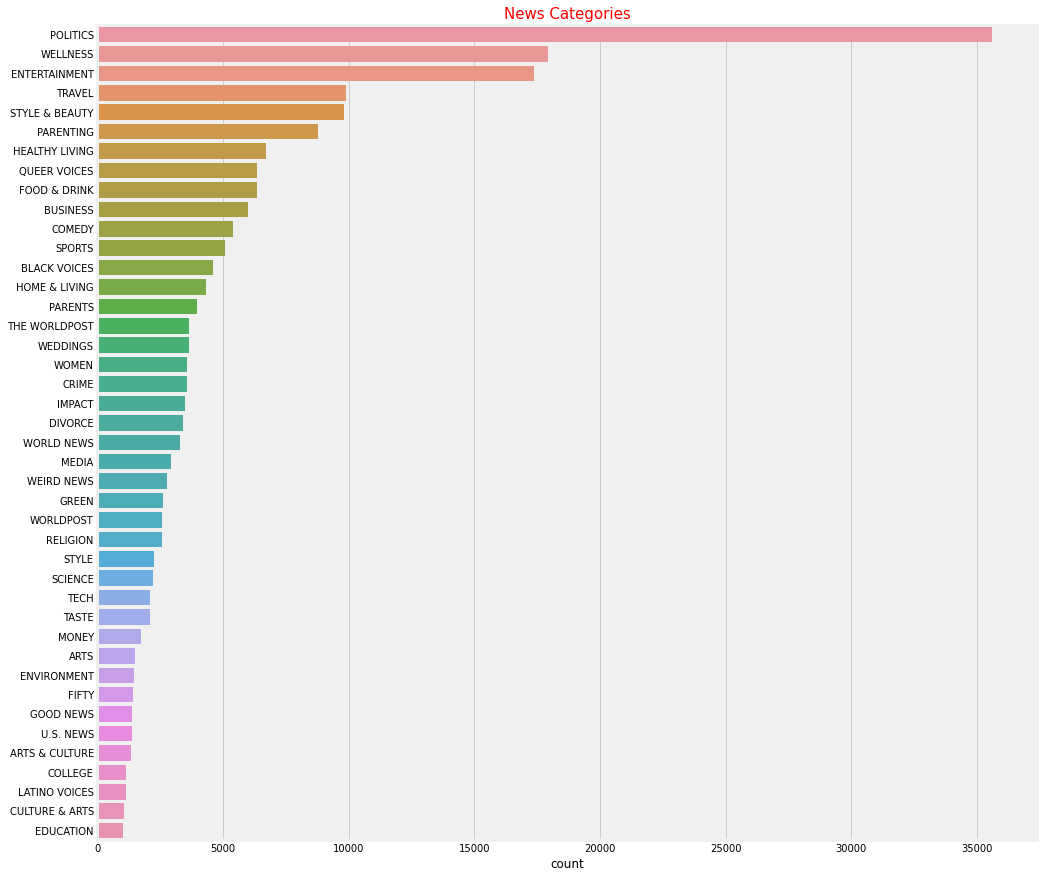

In [8]:
plt.figure(figsize=(15, 15))
sns.countplot(y='category', data=df, order=df['category'].value_counts().sort_values(ascending=False).index)
plt.yticks(rotation=0)
plt.ylabel('')
plt.title('News Categories', fontsize=15, color='red')
plt.show()

In [9]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

df['category_encode']=df[['category']].apply(le.fit_transform)

df.head()

,short_description,category,category_encode
0,Health experts said it is too early to predict...,U.S. NEWS,35
1,He was subdued by passengers and crew when he ...,U.S. NEWS,35
2,"""Until you have a dog you don't understand wha...",COMEDY,5
3,"""Accidentally put grown-up toothpaste on my to...",PARENTING,22
4,Amy Cooper accused investment firm Franklin Te...,U.S. NEWS,35


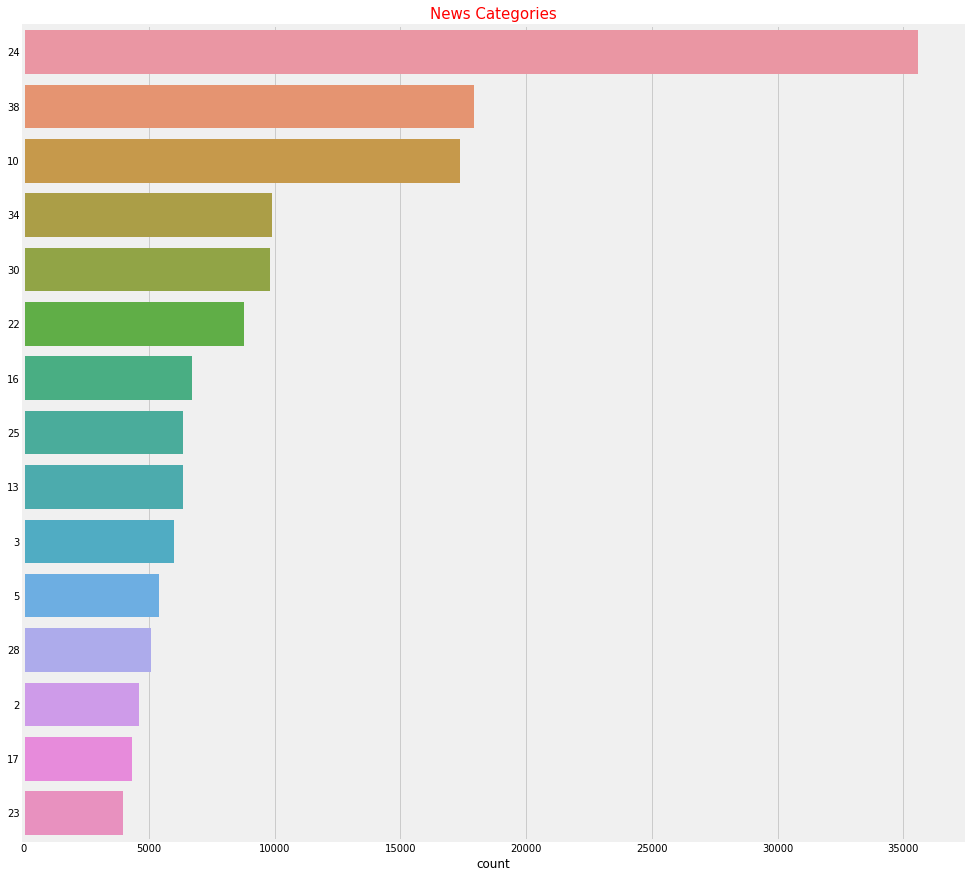

In [10]:
plt.figure(figsize=(15, 15))
sns.countplot(y='category_encode', data=df, order=df['category_encode'].value_counts().head(15).sort_values(ascending=False).index)
plt.yticks(rotation=0)
plt.ylabel('')
plt.title('News Categories', fontsize=15, color='red')
plt.show()

In [11]:
len(df.category.unique()) == len(df.category_encode.unique())

True

In [12]:
!pip install neattext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 114 kB 4.8 MB/s 


In [13]:
import neattext.functions as nfx
import nltk
dir(nfx)
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [14]:
df1=df.copy()
lemm=nltk.WordNetLemmatizer()

In [15]:
df1['short_description']=df1['short_description'].apply(lambda x: x.lower())
df1['clean_text']=df1['short_description'].apply(nfx.remove_hashtags)
df1['clean_text']=df1['clean_text'].apply(nfx.remove_html_tags)
df1['clean_text']=df1['clean_text'].apply(nfx.remove_stopwords)
df1['clean_text']=df1['clean_text'].apply(nfx.remove_urls)
df1['clean_text']=df1['clean_text'].apply(nfx.remove_userhandles)
df1['clean_text']=df1['clean_text'].apply(nfx.remove_accents)
df1['clean_text']=df1['clean_text'].apply(nfx.remove_bad_quotes)
df1['clean_text']=df1['clean_text'].apply(nfx.remove_btc_address)
df1['clean_text']=df1['clean_text'].apply(nfx.remove_currencies)
df1['clean_text']=df1['clean_text'].apply(nfx.remove_currency_symbols)
df1['clean_text']=df1['clean_text'].apply(nfx.remove_dates)
df1['clean_text']=df1['clean_text'].apply(nfx.remove_emails)
df1['clean_text']=df1['clean_text'].apply(nfx.remove_emojis)
df1['clean_text']=df1['clean_text'].apply(nfx.remove_mastercard_addr)
df1['clean_text']=df1['clean_text'].apply(nfx.remove_md5sha)
df1['clean_text']=df1['clean_text'].apply(nfx.remove_multiple_spaces)
df1['clean_text']=df1['clean_text'].apply(nfx.remove_non_ascii)
df1['clean_text']=df1['clean_text'].apply(nfx.remove_numbers)
df1['clean_text']=df1['clean_text'].apply(nfx.remove_phone_numbers)
df1['clean_text']=df1['clean_text'].apply(nfx.remove_postoffice_box)
df1['clean_text']=df1['clean_text'].apply(nfx.remove_puncts)
df1['clean_text']=df1['clean_text'].apply(nfx.remove_punctuations)
df1['clean_text']=df1['clean_text'].apply(nfx.remove_special_characters)
df1['clean_text']=df1['clean_text'].apply(nfx.remove_stopwords)
df1['clean_text']=df1['clean_text'].apply(nfx.remove_street_address)
df1['clean_text']=df1['clean_text'].apply(nfx.remove_terms_in_bracket)
df1['clean_text']=df1['clean_text'].apply(nfx.remove_visacard_addr)
df1['clean_text']=df1['clean_text'].apply(lambda x: ' '.join([lemm.lemmatize(w) for w in x.split()]))

df['cleaned_short_description']=df1['clean_text']
df.head()

,short_description,category,category_encode,cleaned_short_description
0,Health experts said it is too early to predict...,U.S. NEWS,35,health expert said early predict demand match ...
1,He was subdued by passengers and crew when he ...,U.S. NEWS,35,subdued passenger crew fled aircraft confronta...
2,"""Until you have a dog you don't understand wha...",COMEDY,5,dog understand eaten
3,"""Accidentally put grown-up toothpaste on my to...",PARENTING,22,accidentally grownup toothpaste toddler toothb...
4,Amy Cooper accused investment firm Franklin Te...,U.S. NEWS,35,amy cooper accused investment firm franklin te...


In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [17]:
vect=TfidfVectorizer(min_df=2, max_features=5000)
X=vect.fit_transform(df['cleaned_short_description'])
X.shape

(209527, 5000)

In [18]:
from sklearn.decomposition import LatentDirichletAllocation

In [19]:
LDA=LatentDirichletAllocation(n_components=len(df.category.unique()), learning_method='online', batch_size=512, random_state=21)

LDA.fit(X)

LatentDirichletAllocation(batch_size=512, learning_method='online',
                          n_components=42, random_state=21)

In [20]:
print(len(LDA.components_), type(LDA.components_))

42 <class 'numpy.ndarray'>


In [21]:
single_topic=LDA.components_[0]
top_15_words=single_topic.argsort()[-15:]
print(top_15_words)

[3502 3814  219 4644  791 3701  372   60 4453 1909 4432 4974 2746 2773
 2454]


In [22]:
for i in top_15_words:
  print(vect.get_feature_names_out()[i])

protect
rich
apparently
treatment
class
released
bank
add
tax
gay
take
wrong
making
marriage
job


In [23]:
for i, topic in enumerate(LDA.components_):
  print(f'Top 20 words of the topic : {i}\n')
  print([vect.get_feature_names_out()[i] for i in topic.argsort()[-20:]])
  print('\n')

Top 20 words of the topic : 0

['access', 'significant', 'sale', 'write', 'voter', 'protect', 'rich', 'apparently', 'treatment', 'class', 'released', 'bank', 'add', 'tax', 'gay', 'take', 'wrong', 'making', 'marriage', 'job']


Top 20 words of the topic : 1

['director', 'near', 'original', 'feature', 'rock', 'joy', 'famous', 'return', 'classic', 'teacher', 'advice', 'killed', 'song', 'film', 'felt', 'color', 'husband', 'share', 'pinterest', 'photo']


Top 20 words of the topic : 2

['part', 'low', 'disorder', 'training', 'evidence', 'gps', 'de', 'politics', 'office', 'extra', 'guide', 'date', 'created', 'special', 'answer', 'space', 'bring', 'practice', 'yes', 'course']


Top 20 words of the topic : 3

['position', 'year', 'cat', 'normal', 'queen', 'box', 'cute', 'plenty', 'tried', 'changed', 'positive', 'society', 'christmas', 'planning', 'winter', 'success', 'drug', 'offer', 'coming', 'word']


Top 20 words of the topic : 4

['interesting', 'writer', 'showed', 'successful', 'spending

In [24]:
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(7, 6, figsize=(35, 70), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

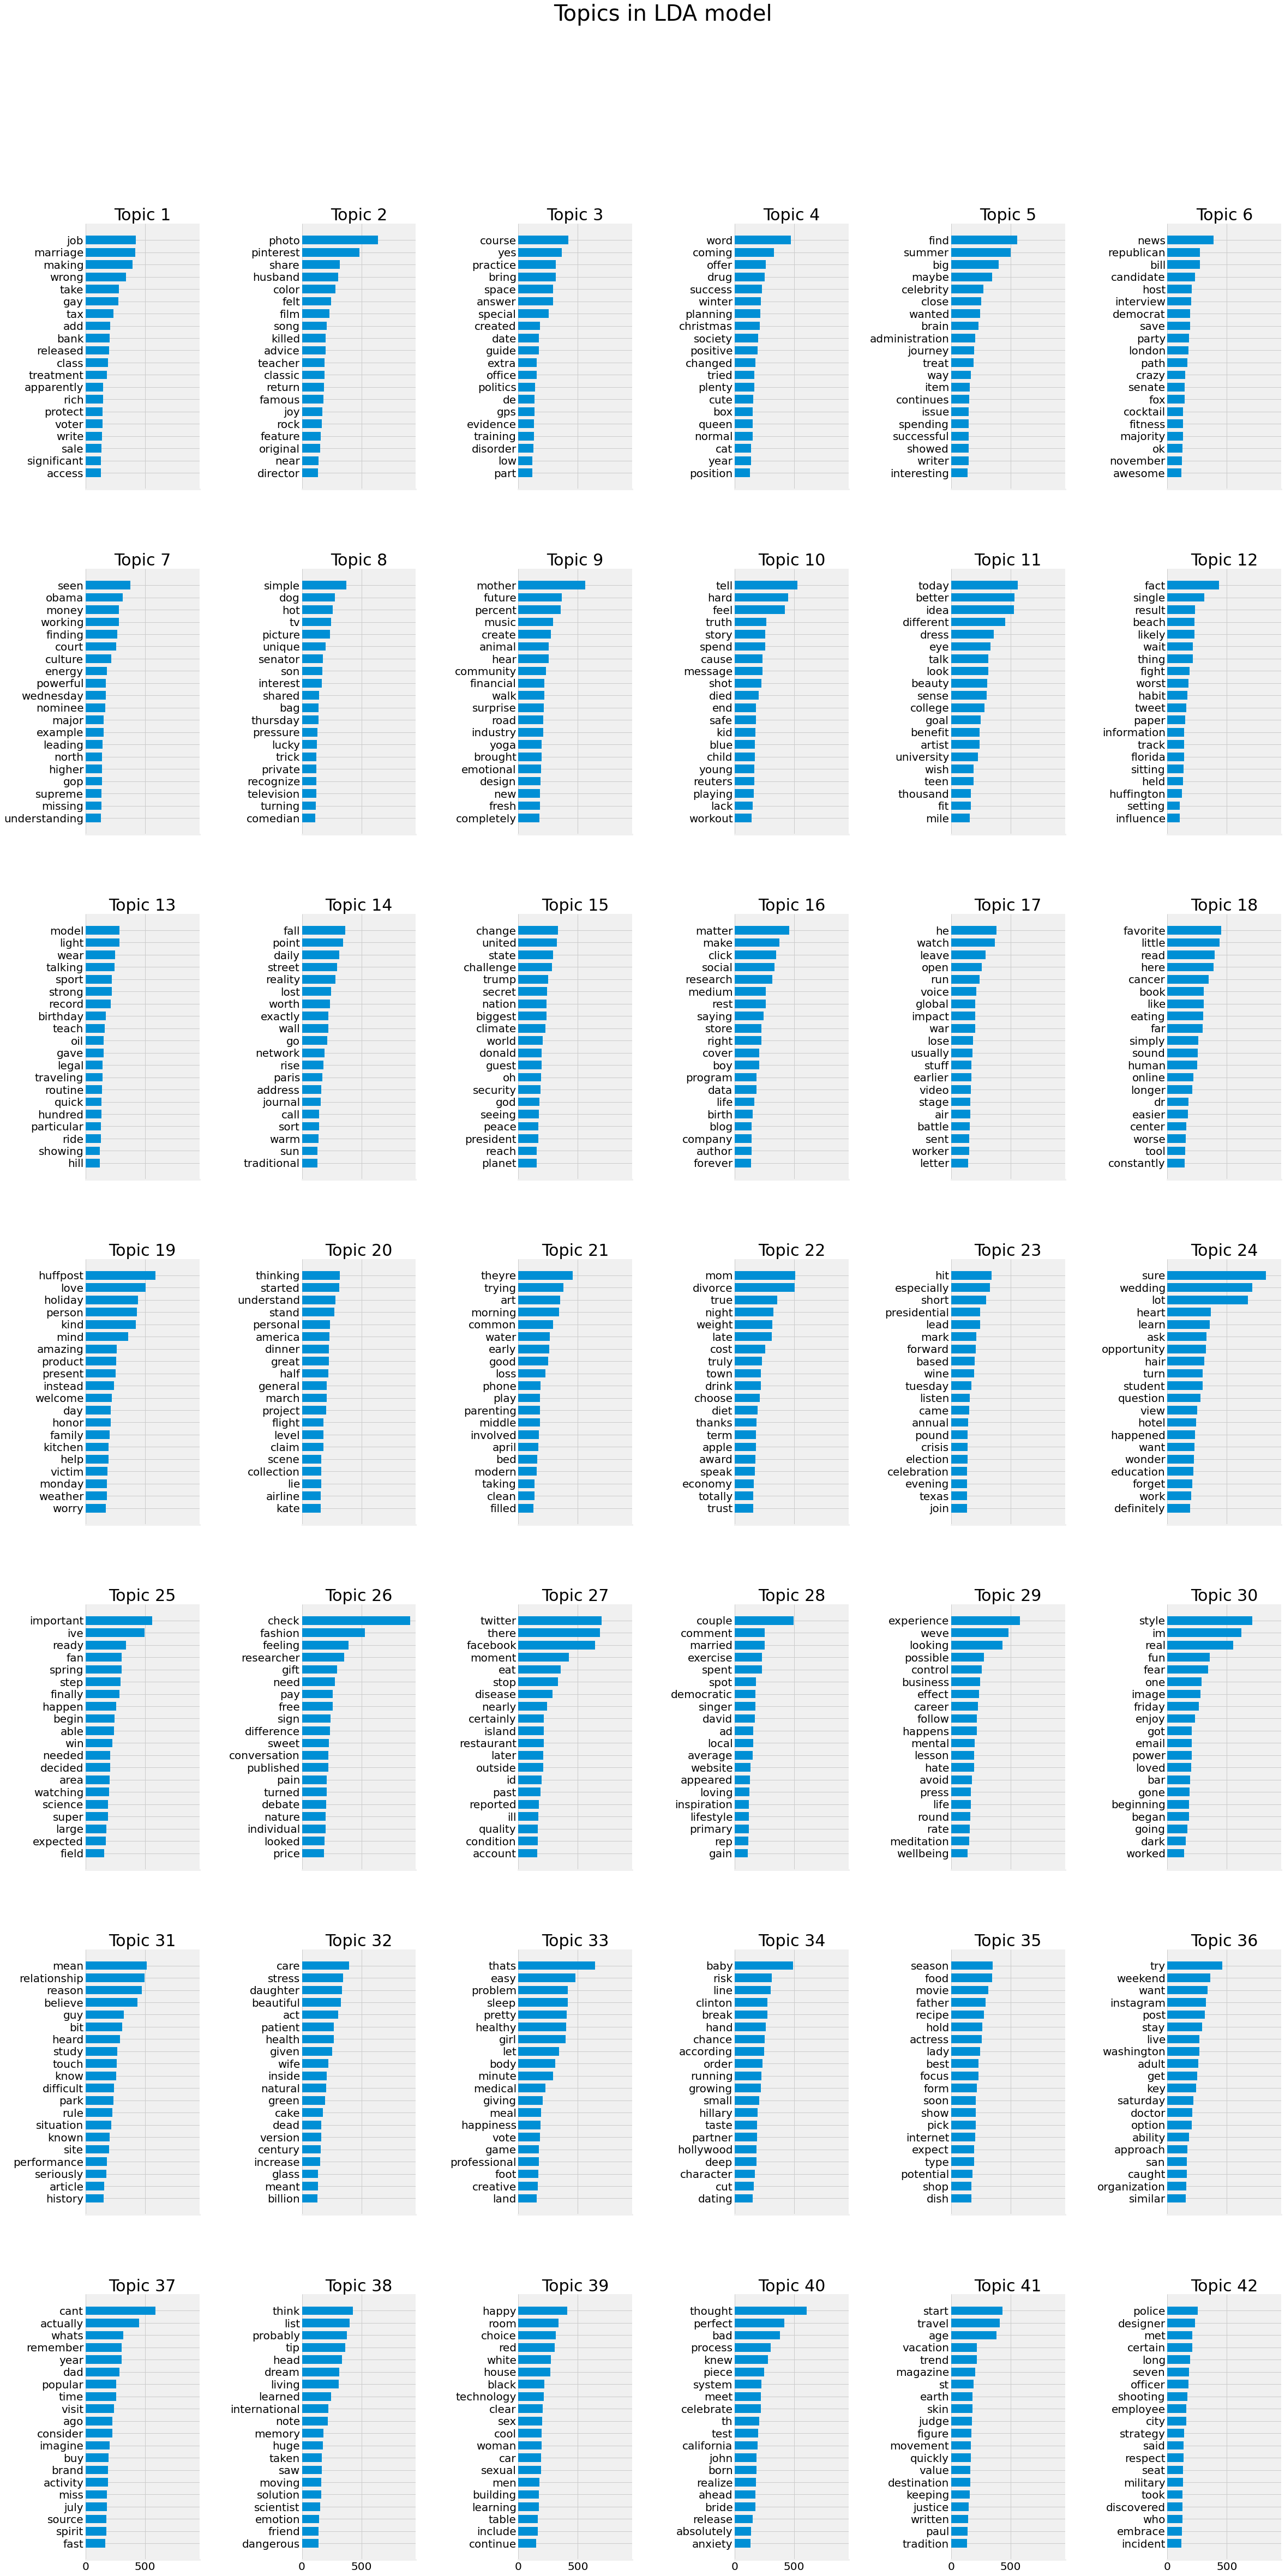

In [25]:
tf_feature_names=vect.get_feature_names_out()
plot_top_words(LDA, tf_feature_names, 20, "Topics in LDA model")

In [26]:
topic_results=LDA.transform(X)
print(topic_results.shape)
print(topic_results[0])

(209527, 42)
[0.00562756 0.00562756 0.00562756 0.00562756 0.00562756 0.00562756
 0.00562756 0.00562756 0.00562756 0.00562756 0.00562756 0.00562756
 0.00562756 0.46345778 0.00562756 0.00562756 0.00562756 0.00562756
 0.00562756 0.00562756 0.07509978 0.00562756 0.00562756 0.00562756
 0.00562756 0.18342404 0.00562756 0.00562756 0.00562756 0.00562756
 0.00562756 0.06417105 0.00562756 0.00562756 0.00562756 0.00562756
 0.00562756 0.00562756 0.00562756 0.00562756 0.00562756 0.00562756]


In [27]:
topic_results[0].argmax()

13

In [28]:
df['topic']=topic_results.argmax(axis=1)
df.head()

,short_description,category,category_encode,cleaned_short_description,topic
0,Health experts said it is too early to predict...,U.S. NEWS,35,health expert said early predict demand match ...,13
1,He was subdued by passengers and crew when he ...,U.S. NEWS,35,subdued passenger crew fled aircraft confronta...,19
2,"""Until you have a dog you don't understand wha...",COMEDY,5,dog understand eaten,7
3,"""Accidentally put grown-up toothpaste on my to...",PARENTING,22,accidentally grownup toothpaste toddler toothb...,41
4,Amy Cooper accused investment firm Franklin Te...,U.S. NEWS,35,amy cooper accused investment firm franklin te...,11


In [29]:
df.category_encode.dtypes, df.topic.dtypes

(dtype('int64'), dtype('int64'))

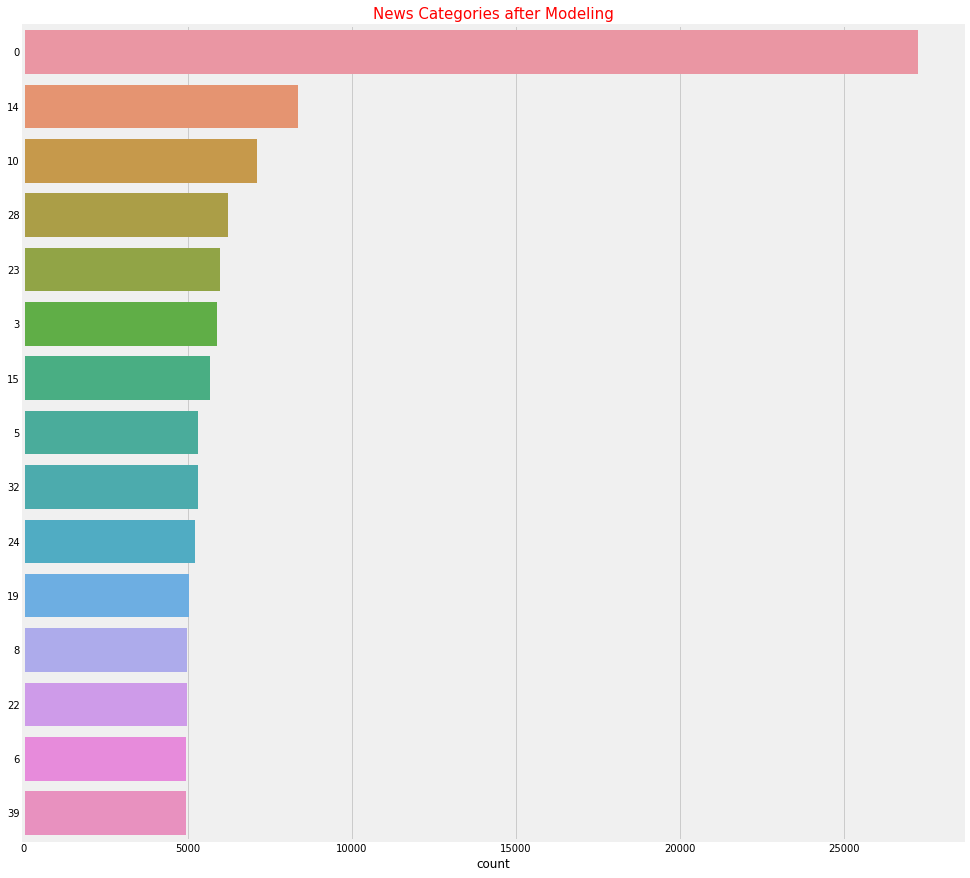

In [30]:
plt.figure(figsize=(15, 15))
sns.countplot(y='topic', data=df, order=df['topic'].value_counts().head(15).sort_values(ascending=False).index)
plt.yticks(rotation=0)
plt.ylabel('')
plt.title('News Categories after Modeling', fontsize=15, color='red')
plt.show()

In [31]:
df.category_encode.value_counts()

24    35602
38    17945
10    17362
34     9900
30     9814
22     8791
16     6694
25     6347
13     6340
3      5992
5      5400
28     5077
2      4583
17     4320
23     3955
33     3664
36     3653
39     3572
6      3562
18     3484
8      3426
40     3299
20     2944
37     2777
15     2622
41     2579
26     2577
29     2254
27     2206
32     2104
31     2096
21     1756
0      1509
11     1444
12     1401
14     1398
35     1377
1      1339
4      1144
19     1130
7      1074
9      1014
Name: category_encode, dtype: int64

In [32]:
df.topic.value_counts()

0     27252
14     8356
10     7121
28     6226
23     5981
3      5903
15     5684
5      5311
32     5303
24     5238
19     5037
8      4972
22     4971
6      4959
39     4951
41     4767
16     4716
17     4585
26     4480
25     4474
29     4450
1      4312
34     4295
33     4289
31     4288
38     4288
21     4285
36     4228
11     4182
18     3818
35     3778
9      3720
37     3700
30     3622
4      3102
20     3039
7      3027
40     2792
13     2751
12     2743
27     2282
2      2249
Name: topic, dtype: int64

In [33]:
df.to_csv('/content/drive/MyDrive/Topic Modeling/final_data.csv', index=False)